# Lab 5: Feedforward Neural Network
## Author: Nigel Nelson
## Introduction:
- This lab explores Multilayer Perceptrons and the ways in which they can be tailored for a given problem. This includes manipulating the input data through transforming the independent variables, as well as through analyzing the effect of activation functions and exploring the roles of the weights and biases used to change the resulting output. The first area of exploration is completed by visualizing the planes that the MLP creates for each of its hidden layer neurons. Next, input is mapped along planes by the ReLU activation function and are visualized in order to attain a better understanding of how inputs are transformed by the inner layers of the perceptron. Lastly, models are created to compare and contrast the effects of transforming data, and the resulting accuracies of these models are analyzed to see what benefits are offered from transforming features prior to training.

---
---
### Reflection Questions:
#### Problem 1:
1. What do the parameters to the MLPClassifier class mean?
  - The first parameter used is *hidden_layer_sizes*. This parameter represents the number of neurons used in the ith hidden layer. The next parameter, *max_iter*, determines that if convergence is not reached first, then the provided argument is the max number of epochs used to train the model. Finally. the parameter *solver* controls what solving method is used to optimize the weights of the perceptron.
2. Draw the network.

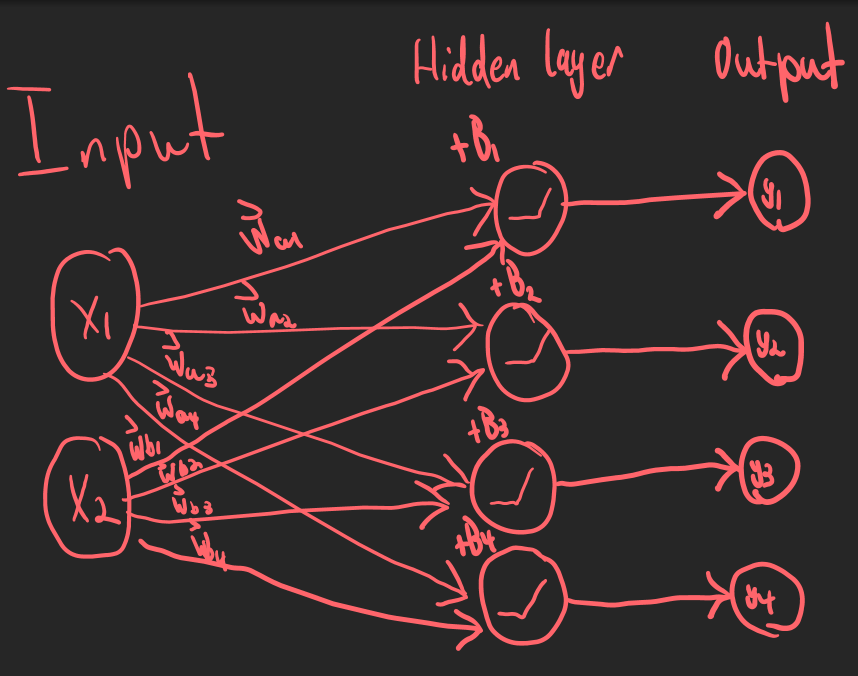

In [1]:
from IPython.display import Image
Image('question1b.PNG', width=400, height=400)

3. What activation functions are used for each node?
  - The default activation function is used, which is the ReLU function

#### Problem 2:
1. What are the dimensions of mlp_petals.coefs_[0] and mlp_petals.intercepts_[0]? Where do 
those dimensions come from?
  - The dimensions of mlp_petals.coefs_[0] is (2,4). This represents the weights of the inputs entering the hidden layer, 2 rows for each input node, and 4 rows for each hidden neuron. The dimensions of mlp_petals.intercepts_[0] is (4,1). These are the biases applied to the input, where there are 4 because there is a single bias for each neuron. 
2. What are the dimensions of mlp_petals_models? What do the dimensions correspond to?
  - The dimensions of the mlp_petals_models are (4,3). The reason for this dimension is because they are a result of combining the intercepts and the transpose of the coefficient vectors discussed in the previous problem.
3. Comment on the abilities of the lines to separate setosa vs the rest, versicolor vs the rest, and 
virginica vs the rest with petal features.
  - In terms on the petal features, the model was most effective at separating Iris Setosa from the other classes. In most all of the model runs, Iris Setosa was always linearly separated from the other classes, likely due to the fact that there was a comparatively large amount of feature space between Iris Setosa and the other classes. The model struggled to separate Iris Versicolor from the other classes, specifically from Iris Virginica. This is due to the fact that in feature space, the two classes are clustered together without clear linear separation between the two of them. For the same reasons, the model struggled to separate Iris Virginica from the other classes as well.  
  
#### Problem 3:
1. How does a ReLU function differ from a logistic function? What would the heatmaps/contour plots look like if we used logistic function as an activation layer instead?
  - The ReLU differs from the logistic function in that it maps values between \[0,infinity), whereas the logistic function maps values between (0,1). If the logistic function was used in place of the ReLU function for our models, the contour plots would appear much less linear. The reason for this is that ReLU is essentially a linear equation when the value is greater than 0, so that is likely the reason why the current contour plots resemble linear planes. However, the logistic function is non-linear and curves as the inputs move towards +/- infinity, and as such, the resulting planes in the contour plots would exhibit this non-linear nature.
2. A neural network consists of different layers and a final classification layer. Which activation 
function (ReLU or logistic) is more suitable to use for a classification layer? Which activation 
function is more suitable to use for an inner layer? – You may need to look up this information.
  - The logistic function would be better suited for the final classification layer. This is because it maps input values to a consistent range of (0,1). This can be used intuitively as a percentage certainty that an input is of a given class, and also allow a threshold to be applied which would result in classification predictions. The ReLU would be better suitable for inner layers because it maintains many of the properties that make linear classifiers great: they're excellent at generalizing and are less likely to overfit than non-linear functions, and are simple to implement. In addition, due to ReLU's property of mapping negative values to 0, they can also act as a switch that remove unwanted values so that inputs that shouldn't impact the output can be switched off.

#### Problem 4:
1. How do the confusion matrices and accuracies of the two models compare? Did the 
transformed features produce a more accurate model?
  - Without a doubt the model using the transformed features performed better than the model that used the original features. The transformed model consistently outputs accuracy scores over 85%. Whereas the original feature model has a much higher degree of variance and ranges in accuracy values from 55% to 85% depending on the run. In addition, the confusion matrix of the transformed model consistently has the majority of its predictions on the diagonal, representing accurate predictions, with only several false negatives and false positives. However, the model that used the original features had many less predictions along the diagonal of the confusion matrix. While the original feature based model seemed to perform well when predicting Iris Setosa and Iris Virginica, or classes 0 and 2, it saw many less accurate predictions when attempting to predict Iris Versicolor, or the class 1. This is likely due to the fact that there is not clear separation between Iris Virginica and Iris Versicolor in feature space, this can be seen in both the petal features plot and the sepal features plot.
  
---
---

### Imports:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from neurons import *

## Part 1: Train Multilayer Perceptron Models on Petal and Sepal Featues
### Loading Iris data set:

In [3]:
features, labels = load_iris(return_X_y=True, as_frame=True)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Training a Petal and a Sepal Based Multi-Layer Peceptron:

In [4]:
scaled_X = StandardScaler().fit_transform(features.to_numpy())

mlp_petals = MLPClassifier(hidden_layer_sizes=(4,),
max_iter=1000, solver="lbfgs")
mlp_petals.fit(scaled_X[:, 2:], labels.to_numpy())

mlp_sepals = MLPClassifier(hidden_layer_sizes=(4,),
max_iter=1000, solver="lbfgs")
mlp_sepals.fit(scaled_X[:, :2], labels.to_numpy())

MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, solver='lbfgs')

## Part 2: Visualize Planes Learned by Individual Neurons
### Extracting the weights from both MLPs:

In [5]:
mlp_petals_models = np.vstack([mlp_petals.intercepts_[0],
mlp_petals.coefs_[0]]).T

mlp_sepals_models = np.vstack([mlp_sepals.intercepts_[0],
mlp_sepals.coefs_[0]]).T

### Creating method that solves for x2 value in linear equation:

In [6]:
def get_x2(B0, B1, B2, x1):
    return -(B0 + B1*x1)/B2

### Creating masks to separate the Iris classes:

In [7]:
setosa_mask = labels == 0
versicolor_mask = labels == 1
virginica_mask = labels == 2

### Plotting scaled petal data with its associated MLP's hidden layer neuron planes:

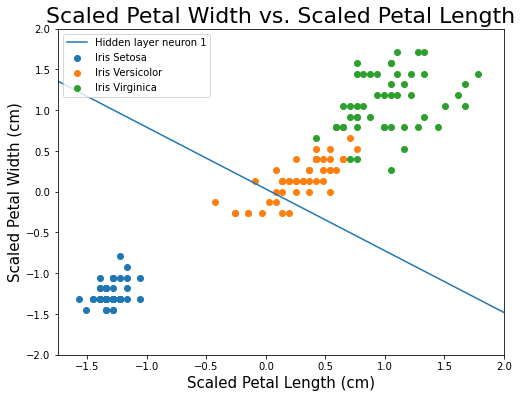

In [8]:
figure, axes = plt.subplots(figsize=(8,6))
axes.scatter(scaled_X[setosa_mask, 2], scaled_X[setosa_mask, 3], label="Iris Setosa")
axes.scatter(scaled_X[versicolor_mask, 2], scaled_X[versicolor_mask, 3], label="Iris Versicolor")
axes.scatter(scaled_X[virginica_mask, 2], scaled_X[virginica_mask, 3], label="Iris Virginica")
axes.set_xlabel('Scaled Petal Length (cm)', fontsize=15)
axes.set_ylabel('Scaled Petal Width (cm)', fontsize=15)
axes.set_title("Scaled Petal Width vs. Scaled Petal Length", fontsize=22)

x1 = np.linspace(-2, 2, 100)
axes.plot(x1, get_x2(
    mlp_petals_models[0,0], mlp_petals_models[0,1], mlp_petals_models[0,2], x1), label='Hidden layer neuron 1')

plt.xlim(-1.75, 2.0)
plt.ylim(-2, 2)
plt.legend(loc=2)

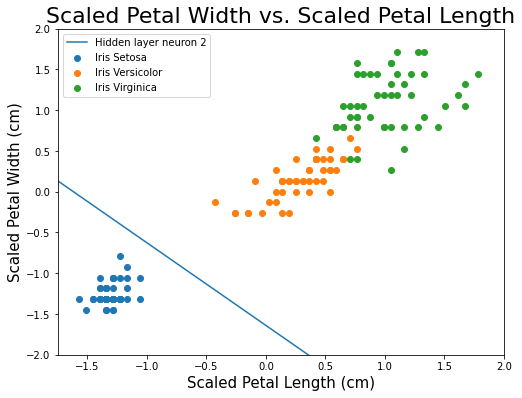

In [9]:
figure, axes = plt.subplots(figsize=(8,6))
axes.scatter(scaled_X[setosa_mask, 2], scaled_X[setosa_mask, 3], label="Iris Setosa")
axes.scatter(scaled_X[versicolor_mask, 2], scaled_X[versicolor_mask, 3], label="Iris Versicolor")
axes.scatter(scaled_X[virginica_mask, 2], scaled_X[virginica_mask, 3], label="Iris Virginica")
axes.set_xlabel('Scaled Petal Length (cm)', fontsize=15)
axes.set_ylabel('Scaled Petal Width (cm)', fontsize=15)
axes.set_title("Scaled Petal Width vs. Scaled Petal Length", fontsize=22)

x1 = np.linspace(-2, 2, 100)
axes.plot(x1, get_x2(
    mlp_petals_models[1,0], mlp_petals_models[1,1], mlp_petals_models[1,2], x1), label='Hidden layer neuron 2')

plt.xlim(-1.75, 2.0)
plt.ylim(-2, 2)
plt.legend(loc=2)

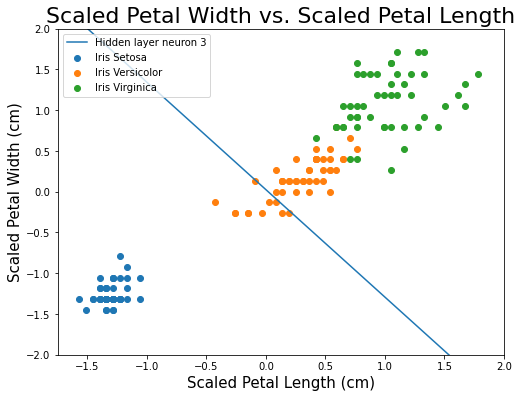

In [10]:
figure, axes = plt.subplots(figsize=(8,6))
axes.scatter(scaled_X[setosa_mask, 2], scaled_X[setosa_mask, 3], label="Iris Setosa")
axes.scatter(scaled_X[versicolor_mask, 2], scaled_X[versicolor_mask, 3], label="Iris Versicolor")
axes.scatter(scaled_X[virginica_mask, 2], scaled_X[virginica_mask, 3], label="Iris Virginica")
axes.set_xlabel('Scaled Petal Length (cm)', fontsize=15)
axes.set_ylabel('Scaled Petal Width (cm)', fontsize=15)
axes.set_title("Scaled Petal Width vs. Scaled Petal Length", fontsize=22)

x1 = np.linspace(-2, 2, 100)
axes.plot(x1, get_x2(
    mlp_petals_models[2,0], mlp_petals_models[2,1], mlp_petals_models[2,2], x1), label='Hidden layer neuron 3')

plt.xlim(-1.75, 2.0)
plt.ylim(-2, 2)
plt.legend(loc=2)

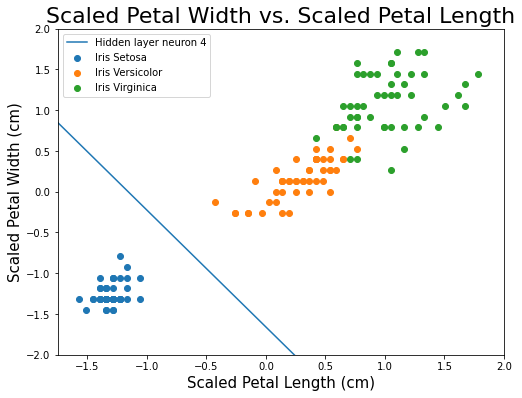

In [11]:
figure, axes = plt.subplots(figsize=(8,6))
axes.scatter(scaled_X[setosa_mask, 2], scaled_X[setosa_mask, 3], label="Iris Setosa")
axes.scatter(scaled_X[versicolor_mask, 2], scaled_X[versicolor_mask, 3], label="Iris Versicolor")
axes.scatter(scaled_X[virginica_mask, 2], scaled_X[virginica_mask, 3], label="Iris Virginica")
axes.set_xlabel('Scaled Petal Length (cm)', fontsize=15)
axes.set_ylabel('Scaled Petal Width (cm)', fontsize=15)
axes.set_title("Scaled Petal Width vs. Scaled Petal Length", fontsize=22)

x1 = np.linspace(-2, 2, 100)
axes.plot(x1, get_x2(
    mlp_petals_models[3,0], mlp_petals_models[3,1], mlp_petals_models[3,2], x1), label='Hidden layer neuron 4')

plt.xlim(-1.75, 2.0)
plt.ylim(-2, 2)
plt.legend(loc=2)

### Plotting scaled sepal data with its associated MLPs hidden layer neron decision boundaries:

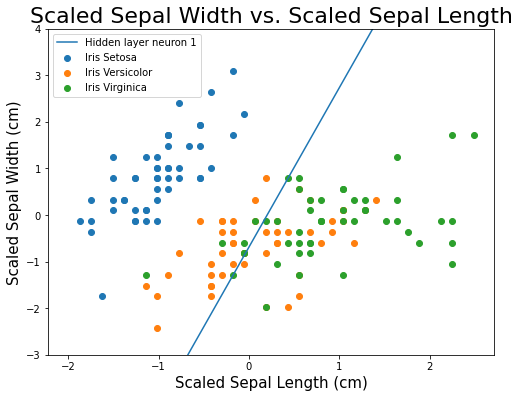

In [12]:
figure, axes = plt.subplots(figsize=(8,6))
axes.scatter(scaled_X[setosa_mask, 0], scaled_X[setosa_mask, 1], label="Iris Setosa")
axes.scatter(scaled_X[versicolor_mask, 0], scaled_X[versicolor_mask, 1], label="Iris Versicolor")
axes.scatter(scaled_X[virginica_mask, 0], scaled_X[virginica_mask, 1], label="Iris Virginica")
axes.set_xlabel('Scaled Sepal Length (cm)', fontsize=15)
axes.set_ylabel('Scaled Sepal Width (cm)', fontsize=15)
axes.set_title("Scaled Sepal Width vs. Scaled Sepal Length", fontsize=22)

x1 = np.linspace(-2, 2, 100)
axes.plot(x1, get_x2(
    mlp_sepals_models[0,0], mlp_sepals_models[0,1], mlp_sepals_models[0,2], x1), label='Hidden layer neuron 1')

plt.ylim(-3, 4)
plt.legend()

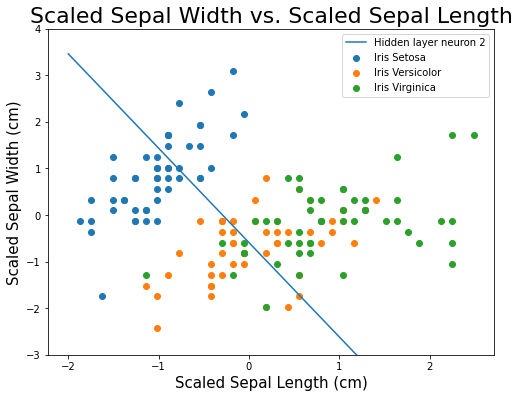

In [13]:
figure, axes = plt.subplots(figsize=(8,6))
axes.scatter(scaled_X[setosa_mask, 0], scaled_X[setosa_mask, 1], label="Iris Setosa")
axes.scatter(scaled_X[versicolor_mask, 0], scaled_X[versicolor_mask, 1], label="Iris Versicolor")
axes.scatter(scaled_X[virginica_mask, 0], scaled_X[virginica_mask, 1], label="Iris Virginica")
axes.set_xlabel('Scaled Sepal Length (cm)', fontsize=15)
axes.set_ylabel('Scaled Sepal Width (cm)', fontsize=15)
axes.set_title("Scaled Sepal Width vs. Scaled Sepal Length", fontsize=22)

x1 = np.linspace(-2, 2, 100)
axes.plot(x1, get_x2(
    mlp_sepals_models[1,0], mlp_sepals_models[1,1], mlp_sepals_models[1,2], x1), label='Hidden layer neuron 2')

plt.ylim(-3, 4)
plt.legend()

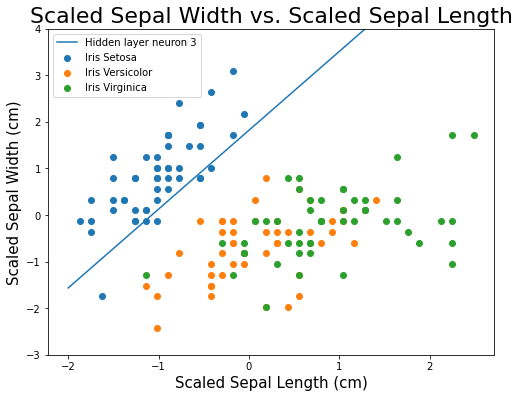

In [14]:
figure, axes = plt.subplots(figsize=(8,6))
axes.scatter(scaled_X[setosa_mask, 0], scaled_X[setosa_mask, 1], label="Iris Setosa")
axes.scatter(scaled_X[versicolor_mask, 0], scaled_X[versicolor_mask, 1], label="Iris Versicolor")
axes.scatter(scaled_X[virginica_mask, 0], scaled_X[virginica_mask, 1], label="Iris Virginica")
axes.set_xlabel('Scaled Sepal Length (cm)', fontsize=15)
axes.set_ylabel('Scaled Sepal Width (cm)', fontsize=15)
axes.set_title("Scaled Sepal Width vs. Scaled Sepal Length", fontsize=22)

x1 = np.linspace(-2, 2, 100)
axes.plot(x1, get_x2(
    mlp_sepals_models[2,0], mlp_sepals_models[2,1], mlp_sepals_models[2,2], x1), label='Hidden layer neuron 3')

plt.ylim(-3, 4)
plt.legend()

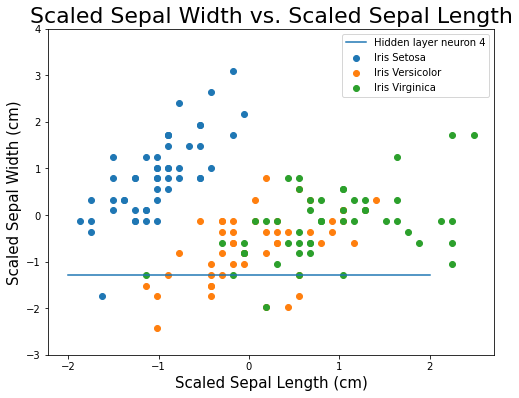

In [15]:
figure, axes = plt.subplots(figsize=(8,6))
axes.scatter(scaled_X[setosa_mask, 0], scaled_X[setosa_mask, 1], label="Iris Setosa")
axes.scatter(scaled_X[versicolor_mask, 0], scaled_X[versicolor_mask, 1], label="Iris Versicolor")
axes.scatter(scaled_X[virginica_mask, 0], scaled_X[virginica_mask, 1], label="Iris Virginica")
axes.set_xlabel('Scaled Sepal Length (cm)', fontsize=15)
axes.set_ylabel('Scaled Sepal Width (cm)', fontsize=15)
axes.set_title("Scaled Sepal Width vs. Scaled Sepal Length", fontsize=22)

x1 = np.linspace(-2, 2, 100)
axes.plot(x1, get_x2(
    mlp_sepals_models[3,0], mlp_sepals_models[3,1], mlp_sepals_models[3,2], x1), label='Hidden layer neuron 4')

plt.ylim(-3, 4)
plt.legend()

## 3) Part 3: Visualize Decision Boundaries Resulting from Planes and ReLU Activation Function
### Creating a grid of test points:

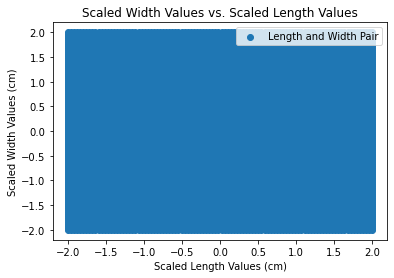

In [16]:
points = np.linspace(-2,2, 100)
x, y = np.meshgrid(points, points)
plt.scatter(x, y, label="Length and Width Pair")
plt.xlabel('Scaled Length Values (cm)')
plt.ylabel('Scaled Width Values (cm)')
plt.title("Scaled Width Values vs. Scaled Length Values")
plt.legend()

### Calculating values of 1st hidden layer neuron at each grid point for petals model:

Text(0.5, 1.0, 'Scaled Petal Width vs. Scaled Petal Length')

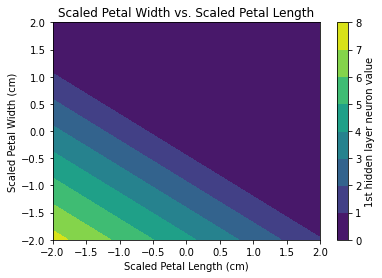

In [17]:
X = np.hstack([x.reshape(10000,1), y.reshape(10000,1)])
input = Input()
p_layer = Neuron([input], mlp_petals_models[0, :])
pred = p_layer.predict(X)

plt.contourf(x, y, pred.reshape(100,100))
cbar = plt.colorbar()
cbar.ax.set_ylabel("1st hidden layer neuron value")
plt.xlabel('Scaled Petal Length (cm)')
plt.ylabel('Scaled Petal Width (cm)')
plt.title("Scaled Petal Width vs. Scaled Petal Length")

### Calculating values of 2nd hidden layer neuron at each grid point for petals model:

Text(0.5, 1.0, 'Scaled Petal Width vs. Scaled Petal Length')

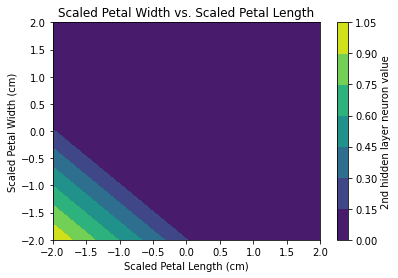

In [18]:
input = Input()
p_layer = Neuron([input], mlp_petals_models[1, :])
pred = p_layer.predict(X)

plt.contourf(x, y, pred.reshape(100,100))
cbar = plt.colorbar()
cbar.ax.set_ylabel("2nd hidden layer neuron value")
plt.xlabel('Scaled Petal Length (cm)')
plt.ylabel('Scaled Petal Width (cm)')
plt.title("Scaled Petal Width vs. Scaled Petal Length")

### Calculating values of 3rd hidden layer neuron at each grid point for petals model:

Text(0.5, 1.0, 'Scaled Petal Width vs. Scaled Petal Length')

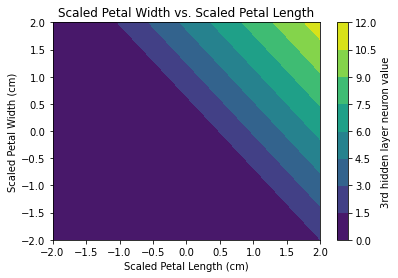

In [19]:
input = Input()
p_layer = Neuron([input], mlp_petals_models[2, :])
pred = p_layer.predict(X)

plt.contourf(x, y, pred.reshape(100,100))
cbar = plt.colorbar()
cbar.ax.set_ylabel("3rd hidden layer neuron value")
plt.xlabel('Scaled Petal Length (cm)')
plt.ylabel('Scaled Petal Width (cm)')
plt.title("Scaled Petal Width vs. Scaled Petal Length")

### Calculating values of 4th hidden layer neuron at each grid point for petals model:

Text(0.5, 1.0, 'Scaled Petal Width vs. Scaled Petal Length')

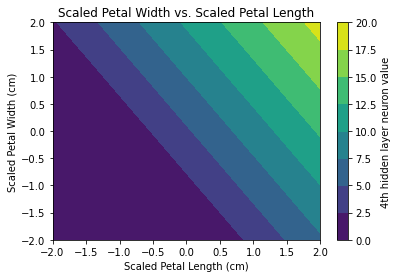

In [20]:
input = Input()
p_layer = Neuron([input], mlp_petals_models[3, :])
pred = p_layer.predict(X)

plt.contourf(x, y, pred.reshape(100,100))
cbar = plt.colorbar()
cbar.ax.set_ylabel("4th hidden layer neuron value")
plt.xlabel('Scaled Petal Length (cm)')
plt.ylabel('Scaled Petal Width (cm)')
plt.title("Scaled Petal Width vs. Scaled Petal Length")

### Calculating values of 1st hidden layer neuron at each grid point for sepals model:

Text(0.5, 1.0, 'Scaled Sepal Width vs. Scaled Sepal Length')

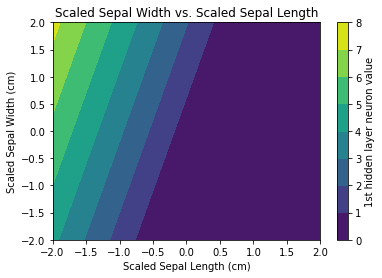

In [21]:
input = Input()
p_layer = Neuron([input], mlp_sepals_models[0, :])
pred = p_layer.predict(X)

plt.contourf(x, y, pred.reshape(100,100))
cbar = plt.colorbar()
cbar.ax.set_ylabel("1st hidden layer neuron value")
plt.xlabel('Scaled Sepal Length (cm)')
plt.ylabel('Scaled Sepal Width (cm)')
plt.title("Scaled Sepal Width vs. Scaled Sepal Length")

### Calculating values of 2nd hidden layer neuron at each grid point for sepals model:

Text(0.5, 1.0, 'Scaled Sepal Width vs. Scaled Sepal Length')

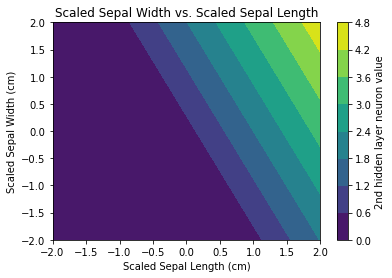

In [22]:
input = Input()
p_layer = Neuron([input], mlp_sepals_models[1, :])
pred = p_layer.predict(X)

plt.contourf(x, y, pred.reshape(100,100))
cbar = plt.colorbar()
cbar.ax.set_ylabel("2nd hidden layer neuron value")
plt.xlabel('Scaled Sepal Length (cm)')
plt.ylabel('Scaled Sepal Width (cm)')
plt.title("Scaled Sepal Width vs. Scaled Sepal Length")

### Calculating values of 3rd hidden layer neuron at each grid point for sepals model:

Text(0.5, 1.0, 'Scaled Sepal Width vs. Scaled Sepal Length')

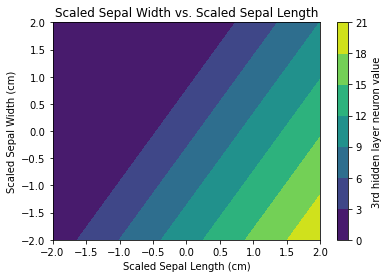

In [23]:
input = Input()
p_layer = Neuron([input], mlp_sepals_models[2, :])
pred = p_layer.predict(X)

plt.contourf(x, y, pred.reshape(100,100))
cbar = plt.colorbar()
cbar.ax.set_ylabel("3rd hidden layer neuron value")
plt.xlabel('Scaled Sepal Length (cm)')
plt.ylabel('Scaled Sepal Width (cm)')
plt.title("Scaled Sepal Width vs. Scaled Sepal Length")

### Calculating values of 4th hidden layer neuron at each grid point for sepals model:

Text(0.5, 1.0, 'Scaled Sepal Width vs. Scaled Sepal Length')

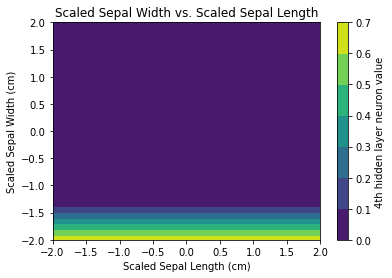

In [24]:
input = Input()
p_layer = Neuron([input], mlp_sepals_models[3, :])
pred = p_layer.predict(X)

plt.contourf(x, y, pred.reshape(100,100))
cbar = plt.colorbar()
cbar.ax.set_ylabel("4th hidden layer neuron value")
plt.xlabel('Scaled Sepal Length (cm)')
plt.ylabel('Scaled Sepal Width (cm)')
plt.title("Scaled Sepal Width vs. Scaled Sepal Length")

## Part 4: Training Logistic Regression models on Transformed and Original Features
### Creating Logistic Regression model for petal features:

In [25]:
input = Input()
p_layer_1 = Neuron([input], mlp_petals_models[0, :])
p_layer_2 = Neuron([input], mlp_petals_models[1, :])
p_layer_3 = Neuron([input], mlp_petals_models[2, :])
p_layer_4 = Neuron([input], mlp_petals_models[3, :])
stacked_petals = HStack([p_layer_1, p_layer_2, p_layer_3, p_layer_4])

### Creating Logistic Regression model for sepal features:

In [26]:
input = Input()
p_layer_1 = Neuron([input], mlp_sepals_models[0, :])
p_layer_2 = Neuron([input], mlp_sepals_models[1, :])
p_layer_3 = Neuron([input], mlp_sepals_models[2, :])
p_layer_4 = Neuron([input], mlp_sepals_models[3, :])
stacked_sepals = HStack([p_layer_1, p_layer_2, p_layer_3, p_layer_4])

### Combining Petal and Sepal Transformed Feature Matrices:

In [27]:
transformed_sepals_X = stacked_sepals.predict(scaled_X[:, 2:])
transformed_petals_X = stacked_petals.predict(scaled_X[:, 2:])
transformed_combined = np.hstack([transformed_sepals_X, transformed_petals_X])

### Creating Train Test split with stratification for original and transformed data:

In [28]:
orig_X_train, orig_X_test, orig_y_train, orig_y_test = train_test_split(
    features, labels, test_size=0.3, stratify=labels)
transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test = train_test_split(
    transformed_combined, labels, test_size=0.3, stratify=labels)

### Training two Logistic Regression models, one on the original data, the other on the transformed data:

In [29]:
orig_features = SGDClassifier(loss="log")
orig_features.fit(orig_X_train, orig_y_train)

transformed_features = SGDClassifier(loss="log")
transformed_features.fit(transformed_X_train, transformed_y_train)

SGDClassifier(loss='log')

### Comparing the accuracies of the two Logistic Regression Models:

In [30]:
orig_accuracy = accuracy_score(
    orig_y_test, orig_features.predict(orig_X_test))
transformed_accuracy = accuracy_score(
    transformed_y_test, transformed_features.predict(transformed_X_test))
print("Original Feature LR model accuracy: " + str(orig_accuracy))
print("Transformed Feature LR model accuracy: " + str(transformed_accuracy))

Original Feature LR model accuracy: 0.6666666666666666
Transformed Feature LR model accuracy: 0.9555555555555556


### Plotting confusion matrices for the predictions of both models:

Text(0, 0.5, 'Number of Predictions')

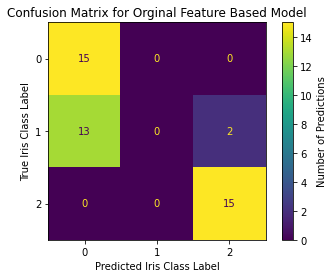

In [31]:
plot_confusion_matrix(orig_features, orig_X_test, orig_y_test)
plt.title("Confusion Matrix for Orginal Feature Based Model")
plt.xlabel("Predicted Iris Class Label")
plt.ylabel("True Iris Class Label")
ax = plt.gca()
im = ax.images 
cb = im[-1].colorbar
cb.ax.set_ylabel("Number of Predictions")

Text(0, 0.5, 'Number of Predictions')

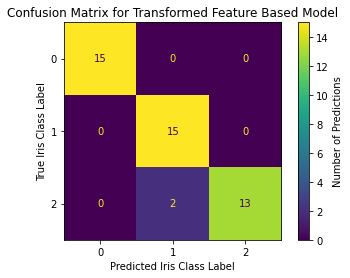

In [32]:
plot_confusion_matrix(transformed_features, transformed_X_test, transformed_y_test)
plt.title("Confusion Matrix for Transformed Feature Based Model")
plt.xlabel("Predicted Iris Class Label")
plt.ylabel("True Iris Class Label")
ax = plt.gca()
im = ax.images 
cb = im[-1].colorbar
cb.ax.set_ylabel("Number of Predictions")

---
---
## Conclusion:
- This lab explored Multilayer Perceptrons and the ways in which they can be tailored for a given problem. It was discovered that each neuron is responsible for transforming input in accordance with the activation function that is used. In relation to this, it was also seen that neurons learn planes in order to separate different classes within the feature space. Lastly, it was realized that transforming features prior to training can lead to significantly better prediction accuracies when compared to using the original features to train a model.